# MSDS 430 Module 6 Python Assignment Solutions  

<div class="alert alert-block alert-warning"><b>In this assignment you will read through the notebook and complete the exercises. Once you are satisfied with the results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</b></div>

<div class="alert alert-block alert-info"> 
    <b>Research project problem statement (continued from Module 5):</b>  
    
There are world happiness surveys conducted every year for many countries around the world. Happiness is measured on such subjective topics as social support, freedom, generosity, corruption, government trust, positive and negative affects.
<br>
    
This study will look at the happiness measures over multiple years to determine which of the measures are related to the overall happiness of a country.  And we will look at population of a country to see if this has any relationship to the happiness measures. Are larger countries based on population happier than smaller countries?<br><br>
    
<b>Objectives:</b>

- Read the clean file from Module 5 into a dataframe
- Use Seaborn pairplots to investigate each field closer and to inspect the relationships between fields
- Use a correlation matrix to look for relationships amoung variables
- Create new column in dataframe
- Learn how to handle a skewed variable
- Subset data by rows (certain years, certain countries)
- Subset data by columns (only include some columns in a new dataframe)
- Learn various ways to plot data using Seaborn and Plotly
- Create derived variables to add to the dataframe
- use dictionary and map to create new field
- seaborn pairplot (with hue)
- groupby with aggregators
- rankings and groupings

</div>

### References:

__[World Happiness Report](https://worldhappiness.report/ed/2022/#appendices-and-data)__

How the indices are calculated for each country: __[World Happiness FAQ](https://worldhappiness.report/faq/)__

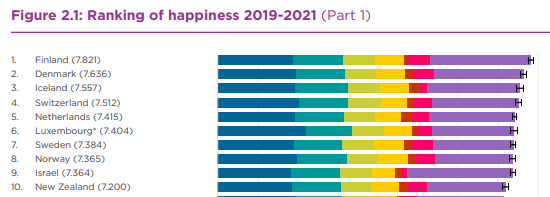

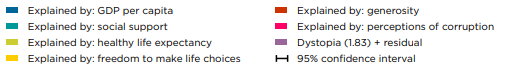

<div class="alert alert-block alert-danger"><b>Reminder: In all of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

In [1]:
# if you have not used plotly before, uncomment this cell and run once
!pip install plotly

In [38]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

### Change Dtype upon reading in file

If you go back and look at the Module 5 code, `Year` was saved as type `object`, but below it is read in by default as an `int64`. The `Year` column will not be used for mathematical operations in our analysis, but instead will be used as a label in plots and is better served as an `object`.  We could convert the variable after the pandas read or we can convert is as we read in the data.

In [39]:
# read in happiness scores
#merged = pd.read_csv('Happiness_clean.csv') # will read in Year as int64

merged = pd.read_csv('Happiness_clean.csv', dtype = {'Year': str})
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                566 non-null    object 
 1   Year                   566 non-null    object 
 2   Life Ladder            566 non-null    float64
 3   Log GDP                566 non-null    float64
 4   Social support         566 non-null    float64
 5   Life Expectancy        566 non-null    float64
 6   Choice Freedom         566 non-null    float64
 7   Generosity             566 non-null    float64
 8   Corruption             566 non-null    float64
 9   Positive affect        566 non-null    float64
 10  Negative affect        566 non-null    float64
 11  Government confidence  566 non-null    float64
 12  Population             566 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 57.6+ KB


,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
0,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557,34413603
1,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990,35383028
2,Afghanistan,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179,36296111
3,Afghanistan,2018,2.694303,7.617663,0.507516,53.575001,0.373536,-0.088125,0.927606,0.384561,0.404904,0.364666,37171922
4,Afghanistan,2019,2.375092,7.632903,0.419973,53.900002,0.393656,-0.103467,0.923849,0.324108,0.502474,0.341482,38041757


### Seaborn pairplots

__[Seaborn pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html)__

The Seaborn pairplot will show a histogram of each variable and a scatterplot of each combination of variables. These views allow you to see the distribution of each individual field and also how each field interacts with the other fields.

In the example below, we are showing `Life Ladder`, `Log GDP` and `Corruption`.  There are a few things of note in the plots:
- There is a positive relationship between Log GDP and Life Ladder which means that as Log GDP increases, so does the Life Ladder score.
- There are two plots with negative leaning relationships: Corruption v. Life Ladder and Corruption v. Log GDP. A negative relationship in these cases indicates that as Corruption increases, Life Ladder (and LogGDP) decreases.
- Corruption is skewed left which means it has a negative skew.

['Life Ladder', 'Log GDP', 'Corruption']

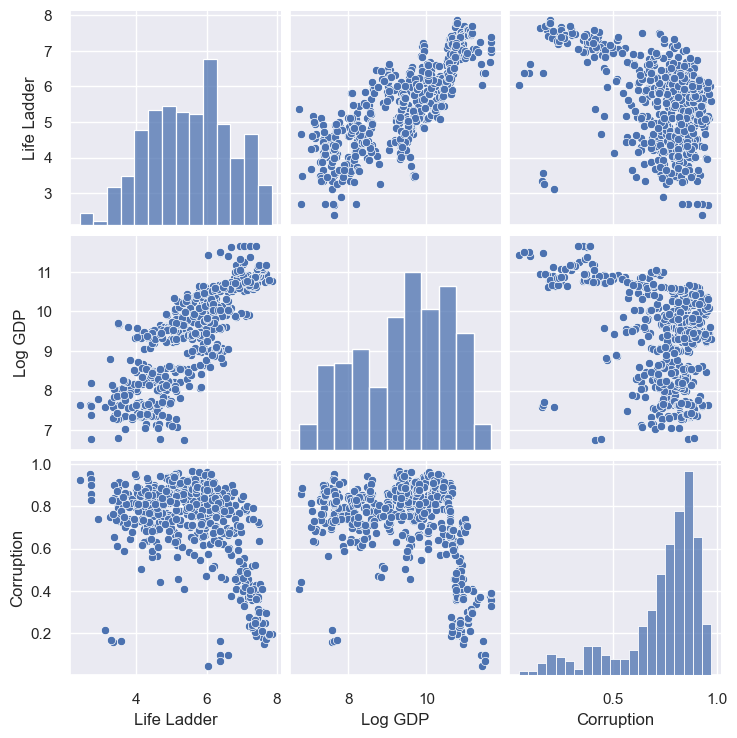

In [40]:
# pairplots on three fields
columns = ['Life Ladder','Log GDP','Corruption']
columns
sns.pairplot(merged[columns])

### Skewed data

- **Negative skew (aka left skewed)**: the left tail is longer and the mass of the distribution is on the right of plot which results in a right leaning curve.
- **Positive skew (aka right skewed)**: the right tail is longer and the mass of the distribution is on the left of the plot which results in a left leaning curve.
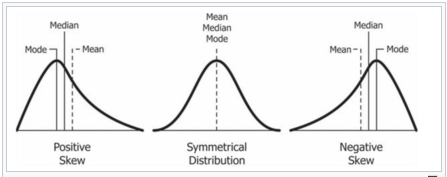
Source: __[What is Skewness?](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)__

In [41]:
import scipy
from scipy.stats import skew

print(skew(merged['Corruption'], axis = 0, bias = True))
merged['Corruption'].skew()

-1.45433598779675


-1.4582033326732935

### Handling skewed data

Data is considered to be skewed when the skew value is +3 or -3.  Even though `Corruption` only has a skew of -1.45, below is sample code of testing out two functions to normalize the data - Numpy's `log` and `square` function.

- `log` is typically used for postively skewed data
- `square` is typically used for negatively skewed data
- Note that there are other alternatives for normalizing data beyond log and square

In [42]:
# testing out log on negatively skewed data and it did not improve the skew
print('------- before log --------------')
merged['Corruption'].skew()
test = np.log(merged['Corruption'])
print('------- after log ---------------')
test.skew()
#test

------- before log --------------


-1.4582033326732935

------- after log ---------------


-2.6417261913936647

Using numpy's `log` function did not improve the skew value. In fact, the negative skew got further to the left from 0. As you can see with the `square` function, the skew value improved and got closer to 0.

In [43]:
# testing out square on negatively skewed data and it did improve skew
print('------- before square --------------')
merged['Corruption'].skew()
print('------- after square ---------------')
test = np.square(merged['Corruption'])
test.skew()
#test

------- before square --------------


-1.4582033326732935

------- after square ---------------


-0.8623948258485358

If you wanted to add the adjusted field to your data, you could use code like what is shown below.

In [44]:
'''
merged['Corruption'].skew()
merged['Corruption_skew'] = np.square(merged['Corruption'])
merged['Corruption_skew'].skew()
'''

"\nmerged['Corruption'].skew()\nmerged['Corruption_skew'] = np.square(merged['Corruption'])\nmerged['Corruption_skew'].skew()\n"

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>: Create a Seaborn pairplot with the following fields:

- Life expectancy
- Log GDP
- Corruption
- Social support
- Choice Freedom
- Generosity
- Population
</div>

['Life Expectancy',
 'Log GDP',
 'Corruption',
 'Social support',
 'Choice Freedom',
 'Generosity',
 'Population']

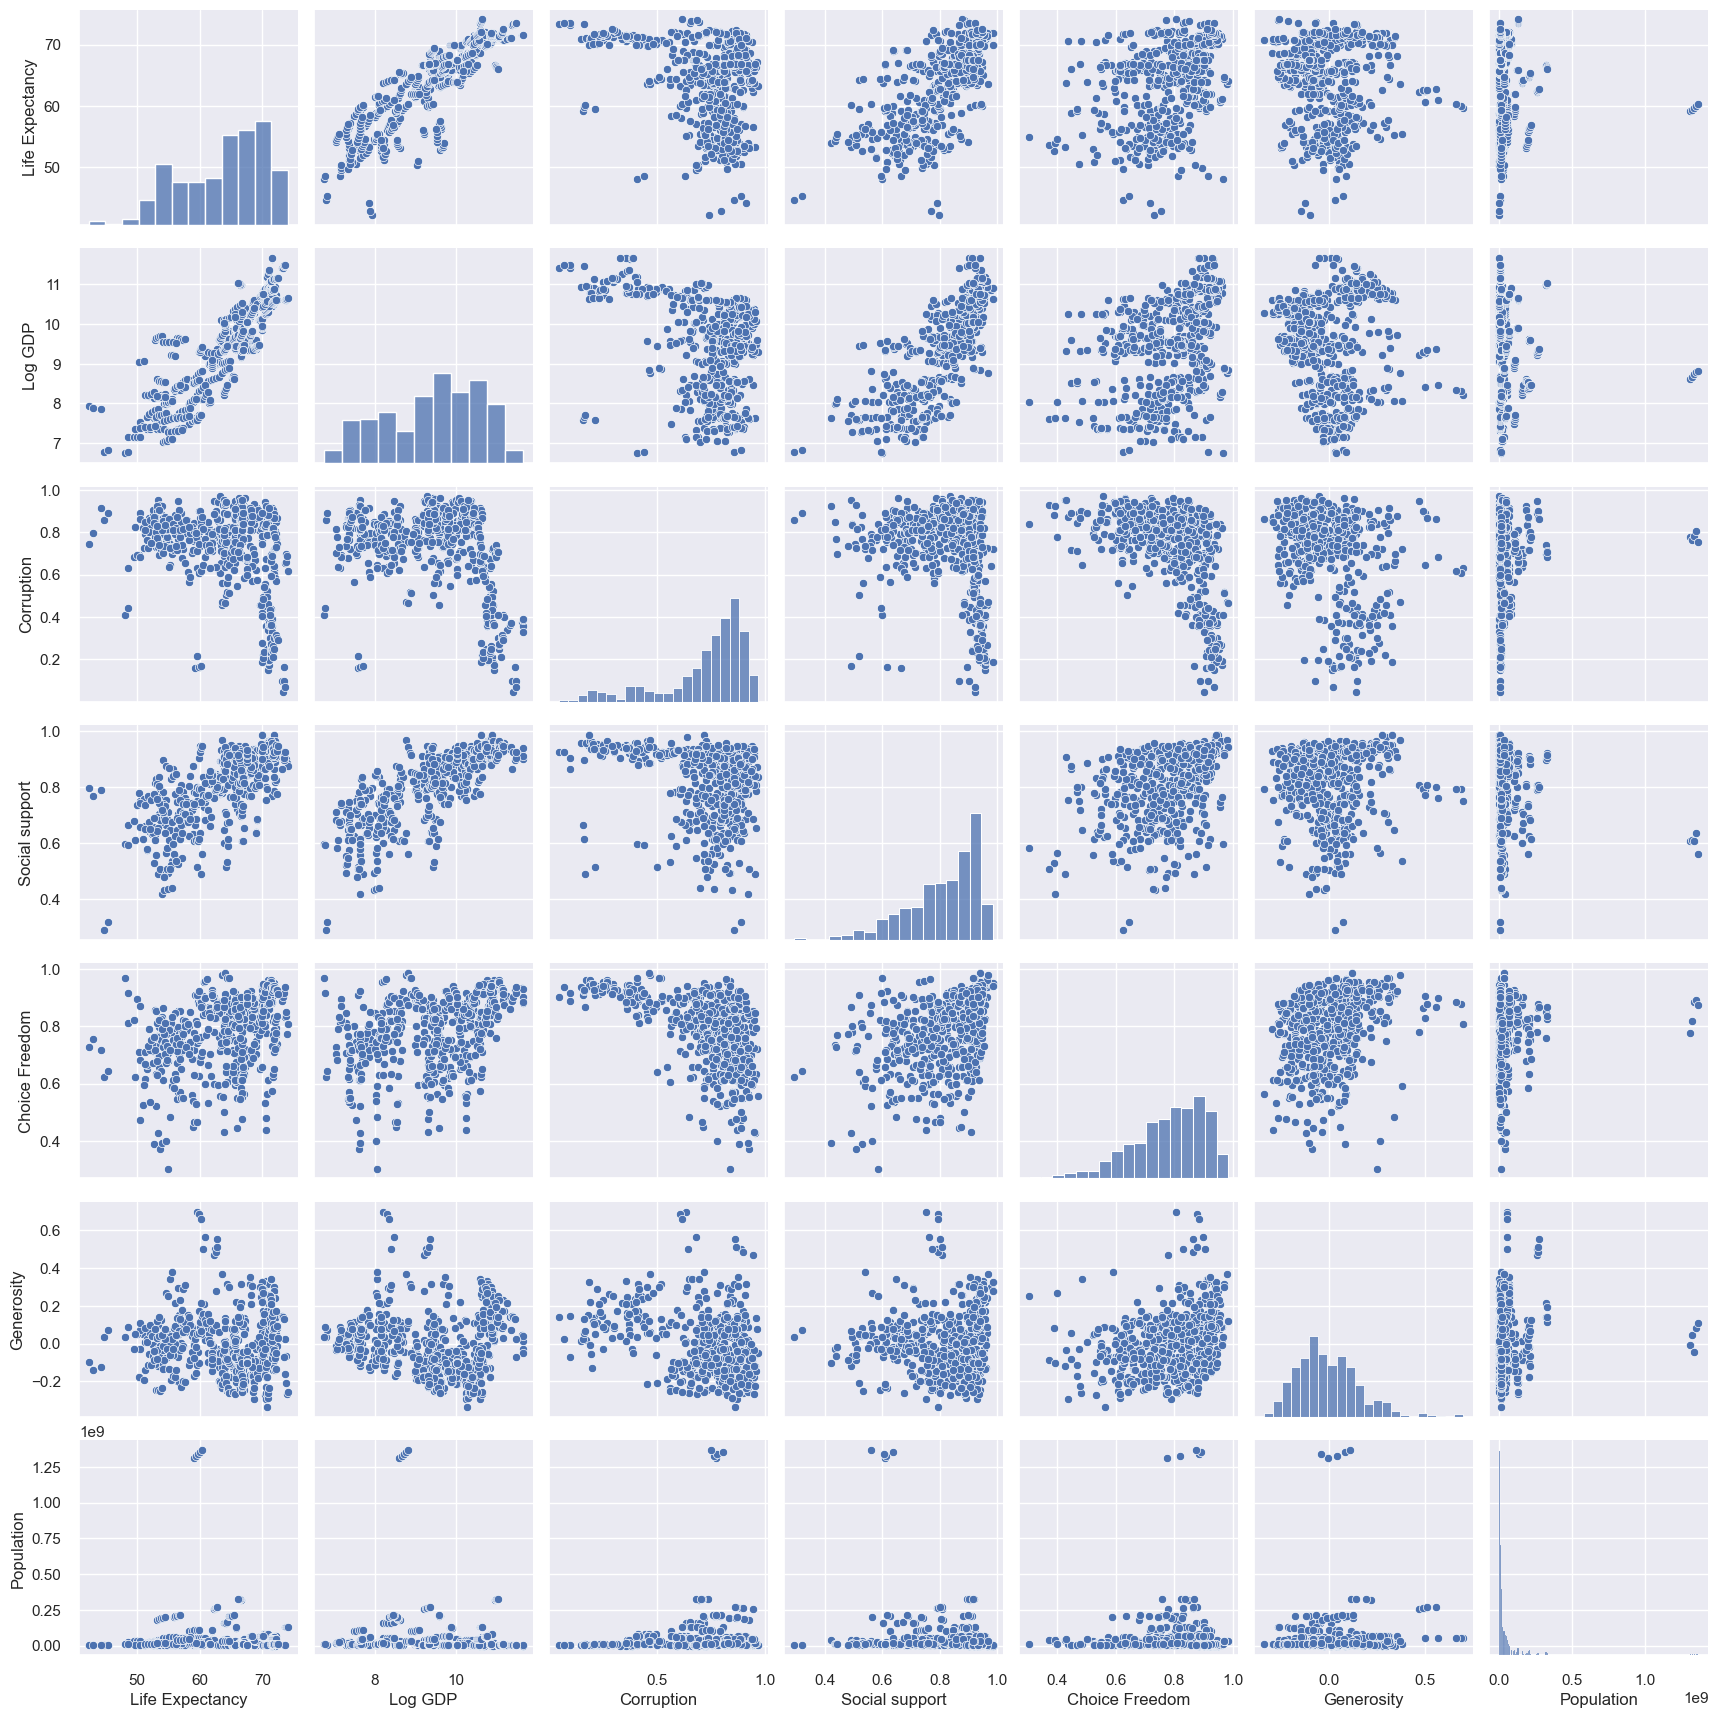

In [45]:
#TODO create pairplot
columns = ['Life Expectancy','Log GDP','Corruption','Social support',
           'Choice Freedom','Generosity','Population']
columns
sns.pairplot(merged[columns])

<div class="alert alert-block alert-success"><b>Problem 2 (2 pts.)</b>: Use a markdown cell to answer the following questions regarding the pairplots:

1. Explain the correlation between Log GDP and Life Expectancy based on the corresponding pairplot.
2. Explain how you would investigate what appear to be outliers in the Population pairplots.
</div>

1. Log GDP and Life Expectancy look to have a very similar graphs across all the fields. These pairplots show that as Log GDP grows, so does Life Expectancy. 
2. To investigate outliers I would find any points that are far away from the main group of points on the graph. For population, it seems a bit obvious which points are the outliers, but I would still zoom in more to make sure I have identified all of the points. After I have found all the outliers, I would try and figure out why they are there. Whether or not the outliers are there because of the data error and if so I would need to fix that, if not, then I would need to make note of that in my final analysis.

<div class="alert alert-block alert-success"><b>Problem 3 (3 pts.)</b>: Complete the following tasks:

1. Display the skew value for `population`.
2. What is the skew value after a `log` transformation?
3. What is the skew value after a `square` transformation?
</div>

In [48]:
#TODO: Display the population skew

print(f"The skew value for Population is {merged['Population'].skew():.2f}")

#TODO: Determine the skew value after a log transformation
 
print(f"The skew value after a log transformation is {np.log(merged['Population']).skew():.2f}")

#TODO: Display the skew value after a square transformation

print(f"The skew value after a square transformation is {np.square(merged['Population']).skew():.2f}")


The skew value for Population is 8.24
The skew value after a log transformation is 0.21
The skew value after a square transformation is 10.44


### Correlation

We will create a correlation matrix and Seaborn heatmap to investigate how happiness measures and population are related, if at all.  More information on creating a heatmap using Seaborn can be found here:
__[Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__

What does the correlation matrix tell us? 
- There is a strong positive relationship (.803) between `Log GDP` and `Life Ladder` which suggests that those countries with a strong GDP have citizens with a better life.
- There is a moderate negative correlation (-.476) between `Corruption` and `Life Ladder` which suggests the less corruption, the better for a country.
- There is a negative correlation (-.374) between `Corruption` and `Log GDP` which suggests that the less corruption, the better the GDP.
- When you look back at the sample pairplots, they visually support these findings

,Life Ladder,Log GDP,Corruption
Life Ladder,1.000000,0.803193,-0.476317
Log GDP,0.803193,1.000000,-0.374004
Corruption,-0.476317,-0.374004,1.000000


<Axes: >

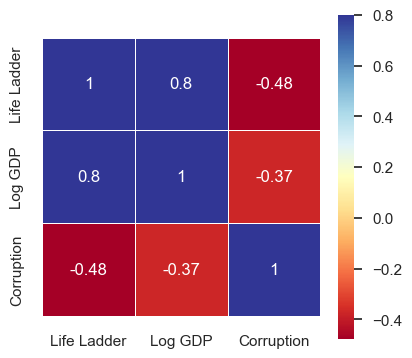

In [49]:
# set up files for correlations
columns = ['Life Ladder','Log GDP', 'Corruption']
df_corr = merged[columns]

# creates a correlation matrix
corrmat = df_corr.corr()
corrmat

# heatmap of correlation matrix
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 )

<div class="alert alert-block alert-success"><b>Problem 4 (3 pts.)</b>: Create a correlation matrix using the Seaborn heatmap and include all numerics in the dataframe starting at `Life Ladder` and ending at `Population`. The heatmap should include eleven variables and use a different color combination than the one above. 
    
__[Colormap Reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)__</div>

<Axes: >

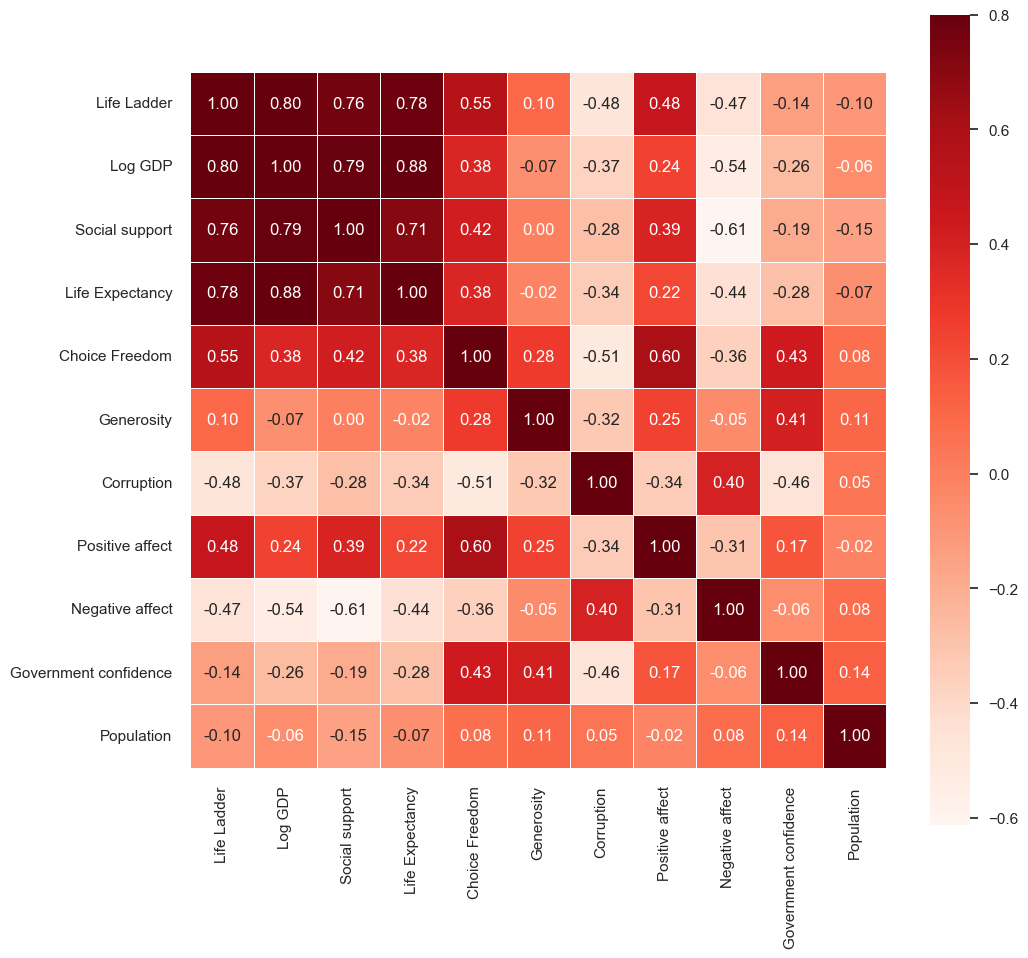

In [50]:
# TODO: Create a heat map using all eleven numeric variables and use a new color combination.

    # set up files for correlations

numeric = merged.select_dtypes(include=np.number).columns.tolist()

df_corr = merged[numeric]

    # creates a correlation matrix

corrmat = df_corr.corr()

    # heatmap of correlation matrix

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'Reds', linewidths= .5,fmt='.2f')

<div class="alert alert-block alert-success"><b>Problem 5 (2 pts.)</b>:
    
Use a markdown cell to answer the following questions regarding the heatmap:
1. One of the research questions was to understand the relationship between population and happiness measures. What does the correlation matrix tell you about this relationship?
2. Another question we wanted to answer was the relationship between life expectancy and happiness measures. What does the correlation matrix tell you about this relationship?
</div>

1. It is interesting because Population has a positive correlation with Government confidence, Negative affect, Corruption, Generosity, and Choice Freedom (about half of the happiness measures) yet has a negative correlation with Positive affect, Life Expectancy, Social Support, Log GDP, and Life Ladder. Because Population is so split in this way and on both sides it is just moderate correlations, I would say there is no significant relationship between Population and the happiness measures. 
2. The relationship between Life Expectancy and the happiness measures have a much more positive correlations than the relationship between Population and the happiness measures. It seems that overall increased happiness (through the happiness measures) provides a greater Life Expectancy. 

### Subset data to look at one country

One way to investigate data is to pull a smaller subset of data so that it is easy to inspect each row and column.

In [51]:
fin = merged[merged['Country'] == 'Finland']
fin

,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
169,Finland,2015,7.447926,10.716029,0.947801,70.699997,0.929862,0.108773,0.223370,0.736426,0.191058,0.557600,5479531
170,Finland,2016,7.659843,10.740882,0.953940,70.775002,0.948372,-0.029360,0.249660,0.768806,0.181998,0.485727,5495303
171,Finland,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.004811,0.192413,0.755858,0.176066,0.597539,5508214
172,Finland,2018,7.858107,10.779988,0.962155,70.925003,0.937807,-0.129722,0.198605,0.748826,0.181781,0.555102,5515525
173,Finland,2019,7.780348,10.792235,0.937416,71.000000,0.947617,-0.054119,0.195338,0.732282,0.180733,0.639188,5521606


### Subset data to look at one year

The heatmap allows us to see which variables have the highest values within the top 20 countries based on `Life Ladder` scores for 2015.


In [52]:
# 2015 only data
year2015 = merged[merged['Year'] == '2015']

# top 20 of 2015 based on life ladder
t2015 = year2015.sort_values(by = ['Life Ladder'], ascending = False)[:20]
t2015.style.background_gradient(cmap = 'Greens')


,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
404,Norway,2015,7.603434,11.050693,0.946834,71.199997,0.947621,0.252847,0.298814,0.796321,0.209410,0.586872,5188607
498,Switzerland,2015,7.572137,11.127645,0.938334,71.699997,0.927802,0.104062,0.209534,0.794054,0.165759,0.787730,8282396
137,Denmark,2015,7.514425,10.876019,0.959701,70.500000,0.941436,0.219611,0.191016,0.801433,0.217578,0.579889,5683483
228,Iceland,2015,7.498071,10.861744,0.980283,71.900002,0.940485,0.297560,0.638662,0.794291,0.179504,0.427228,330815
169,Finland,2015,7.447926,10.716029,0.947801,70.699997,0.929862,0.108773,0.223370,0.736426,0.191058,0.557600,5479531
379,New Zealand,2015,7.418121,10.623425,0.987343,69.900002,0.941784,0.325948,0.185889,0.794508,0.159830,0.620908,4609400
94,Canada,2015,7.412773,10.768951,0.939067,71.099998,0.931469,0.250651,0.427152,0.791709,0.286280,0.644104,35702908
374,Netherlands,2015,7.324437,10.877559,0.879010,71.099998,0.903979,0.259138,0.411822,0.742388,0.202129,0.579621,16939923
20,Australia,2015,7.309061,10.769942,0.951862,70.599998,0.921871,0.330029,0.356554,0.749504,0.209637,0.478557,23815995
493,Sweden,2015,7.288922,10.838187,0.929460,71.400002,0.935072,0.209648,0.231964,0.766198,0.190992,0.499302,9799186


### Results of heatmap of top 20 for 2015 based on Life Ladder

- For the top 20, the most consistent four categories with the highest scores are Choice Freedom, Life Expectancy, Social Support and Generosity.  Corruption has lower values.
- Interesting to note that the top 20 do not include many of the large populated countries.


<div class="alert alert-block alert-success"><b>Problem 6 (2 pts.)</b>:
    
Create a new gradient heatmap (not a correlation matrix) for one country:
1. Create a new data object that only contains data for any country of your choosing.
2. Show a heatmap of all years for the country sorted on the Year value.  Consider using a different color for your heatmap.

</div>

In [53]:
#TODO: Isolate one country - your choice of country
 
switz = merged[merged['Country'] == 'Switzerland']

#TODO: Create a heatmap of your country with all measures

switz_sorted = switz.sort_values(by = ['Year'], ascending = False)

switz_sorted.style.background_gradient(cmap = 'Reds')
 

,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
502,Switzerland,2019,7.694221,11.169651,0.948513,72.500000,0.913167,0.030928,0.293701,0.742528,0.170762,0.806613,8575280
501,Switzerland,2018,7.508587,11.164747,0.930291,72.300003,0.926415,0.095868,0.301260,0.755630,0.191520,0.849979,8514329
500,Switzerland,2017,7.473593,11.143362,0.949661,72.099998,0.924997,0.174821,0.316183,0.733584,0.195871,0.819707,8451840
499,Switzerland,2016,7.458520,11.136970,0.927628,71.900002,0.933947,0.083346,0.301563,0.758317,0.206317,0.798537,8373338
498,Switzerland,2015,7.572137,11.127645,0.938334,71.699997,0.927802,0.104062,0.209534,0.794054,0.165759,0.787730,8282396


### Plotting using Seaborn and Plotly

In the example below, we are selecting a subset of columns from 2015 with four columns - `Country`, `Life Ladder`, `Log GDP` and `Social support`.  Note that we created two files, one for the bottom of 2015 based on `Life Ladder` and one for all of 2015. We will use these files for plotting examples.


In [54]:
# isolate four fields for the bottom 20 of 2015
b2015 = year2015.sort_values(by = ['Life Ladder'], ascending = True)[:20]

subset2015b = b2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]
# isolate four fields for all of 2015
subset2015all = year2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]

### Seaborn styles

You can change the style of your plots, but once you set the style, it is set for the whole notebook whenever you use Seaborn.

In [55]:
# seaborn styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Stacked barchart

This stacked barchart below is using the data from the bottom 20 countries for 2015.

__[Stacked Bar Plot](https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/)__

C:\Users\enm2441\AppData\Local\Temp\ipykernel_14808\3829428293.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



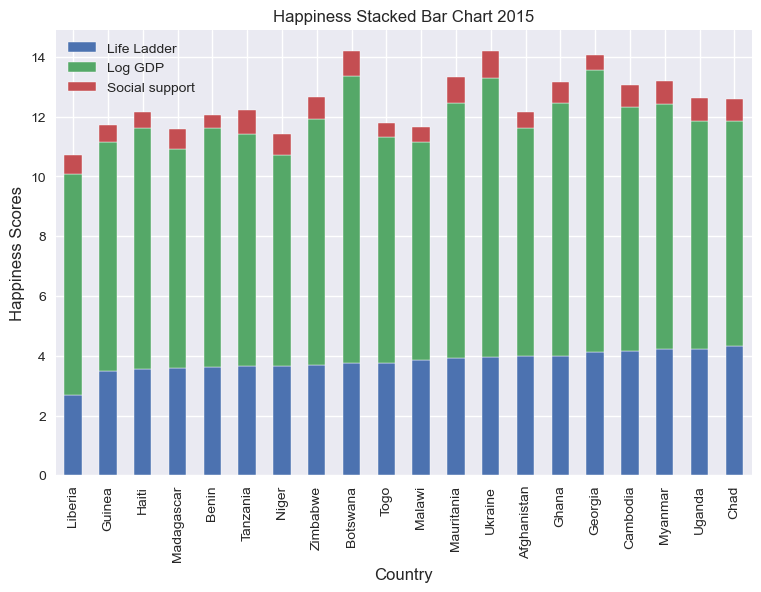

In [56]:
# example using the seaborn style
plt.style.use('seaborn')
subset2015b.plot(x = 'Country', kind = 'bar', stacked = True, title = 'Happiness Stacked Bar Chart 2015',
                ylabel = 'Happiness Scores')
ax.legend
plt.show();

### Horizontal barchart with one Happiness characteristic

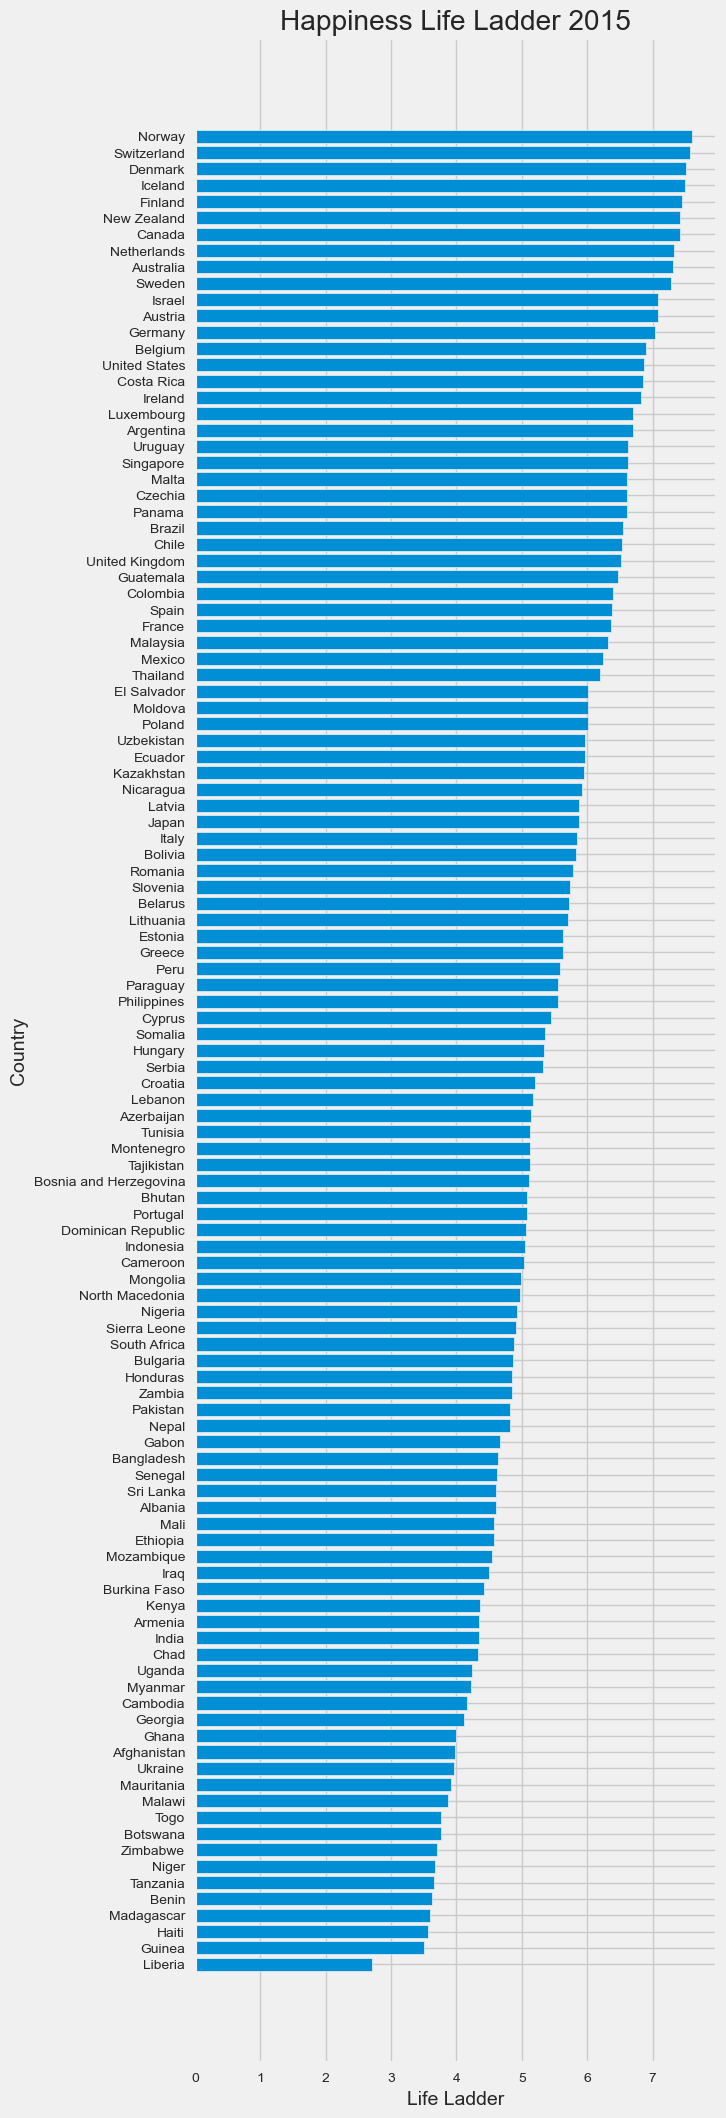

In [57]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (6, 25))

subset2015all = subset2015all.sort_values(by = 'Life Ladder')

ax.barh(subset2015all['Country'], subset2015all['Life Ladder'], align = 'center')

ax.set(xlabel = 'Life Ladder', ylabel = 'Country',
       title = 'Happiness Life Ladder 2015');

### Example of bad graph

- There is no header
- There is no x or y axis label
- The country names on the x axis are all running together; this can be fixed by rotating the axis label

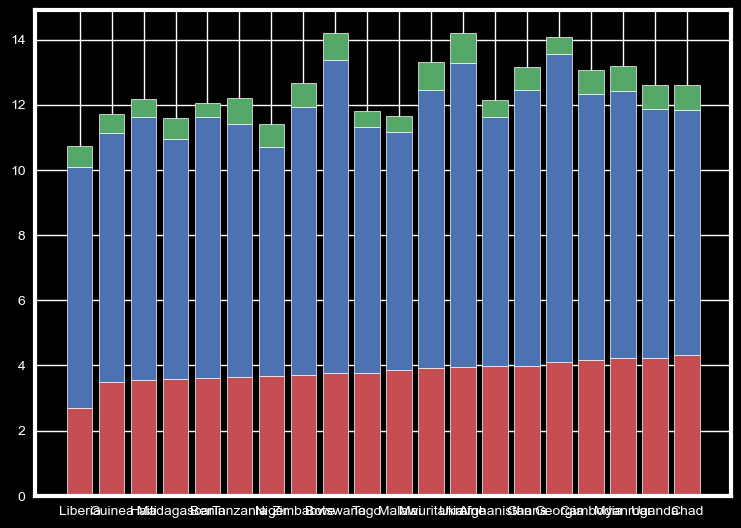

In [58]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (8, 6))

x = subset2015b['Country']
y1 = subset2015b['Life Ladder']
y2 = subset2015b['Log GDP']
y3 = subset2015b['Social support']

plt.bar(x, y1, color = 'r');
plt.bar(x, y2, bottom = y1, color = 'b');
plt.bar(x, y3, bottom = y1+y2, color = 'g');


### Horizontal stacked barchart

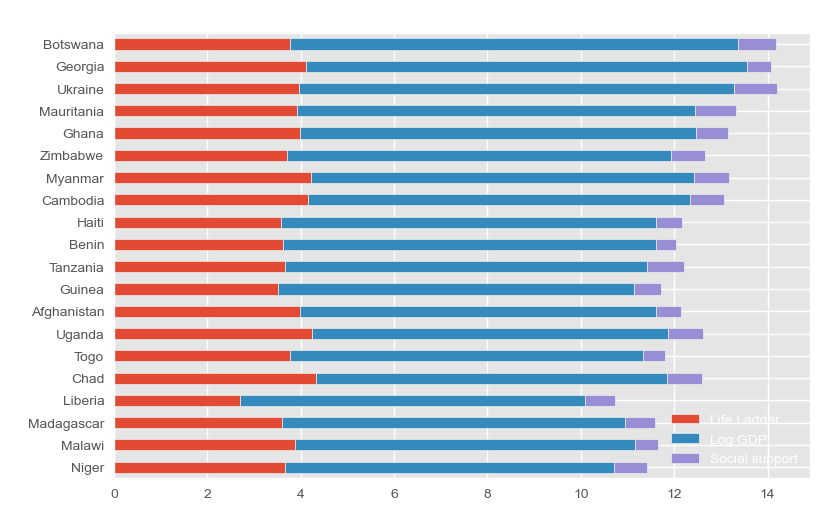

In [59]:
plt.style.use('ggplot')
subset2015sorted = subset2015b.sort_values(by = 'Log GDP', ascending = True)
subset2015sorted.plot(x = 'Country', kind = 'barh', stacked = True, title = '2015 Happiness')
plt.xlabel('Category scores');
plt.show();

### Plotting with three variables

The plotly bubble chart below shows `Life Ladder`, `Life Expectancy` and `Population`. This uses the y-axis, x-axis and the size of the circle represents the size of the population. The purpose of this plot is to visually inspect the countries selected in regards to three variables selected.

Hover over each circle to see the three values plotted for that country.

__[Bubble Charts](https://plotly.com/python/bubble-charts/)__

In [60]:
# set theme back to default
sns.set_theme()

# bubble chart
fig = px.scatter(b2015, x = "Life Expectancy", y = "Life Ladder", color = 'Country', 
                 size = 'Population', size_max = 60, text = 'Country',
        title='Happiness and Population in 2015', 
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_layout(xaxis_title = 'Life Expectancy',
                 yaxis_title = 'Life Ladder');
fig.show();

<div class="alert alert-block alert-success"><b>Problem 7 (6 pts.)</b>: 
    
- Use only 2019 data.
- From the 2019 data, select any 10 countries to create a plotly bubble chart.  
- Also select any three fields for the chart.  Keep in mind that the size of the bubble helps to provide insight to the chart; consider this when choosing which variable to represent the bubble.
- Make sure your plot has x axis labels, y axis labels and a title.
</div>

In [61]:
# TODO: Create a subset of 10 countries using only 2019 data

only2019 = merged[merged['Year'] == '2019']

newvar_10_countries_df = only2019.sort_values(by = 'Life Expectancy',ascending=True)[:10]

newvar_10_countries_df
 

,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
289,Lesotho,2019,3.511781,7.857065,0.789705,44.200001,0.716314,-0.125442,0.914951,0.707126,0.273426,0.310274,2125267
360,Mozambique,2019,4.932133,7.156005,0.742304,50.400002,0.869810,0.073518,0.681900,0.587998,0.384123,0.794083,30366043
163,Eswatini,2019,4.396115,9.065653,0.759098,51.025414,0.596682,-0.191393,0.723508,0.725605,0.279595,0.682606,1148133
105,Chad,2019,4.250799,7.364944,0.640452,52.000000,0.537246,0.055652,0.832283,0.556211,0.460061,0.571986,15946882
466,Sierra Leone,2019,3.447381,7.441432,0.610780,52.900002,0.717770,0.075185,0.873861,0.521151,0.438134,0.817156,7813207
565,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455,14645473
213,Guinea,2019,4.767684,7.850506,0.655124,53.299999,0.691399,0.096930,0.755585,0.669558,0.473388,0.579257,12771246
70,Botswana,2019,3.471085,9.701856,0.773667,53.900002,0.832543,-0.234603,0.792080,0.665050,0.272722,0.690070,2303703
4,Afghanistan,2019,2.375092,7.632903,0.419973,53.900002,0.393656,-0.103467,0.923849,0.324108,0.502474,0.341482,38041757
398,Nigeria,2019,4.266484,8.543932,0.734995,54.400002,0.746269,0.022977,0.873036,0.698243,0.229004,0.399433,200963603


<div class="alert alert-block alert-success"><b>Problem 7 continued:</b> Create a bubble chart.</div>

In [62]:
# TODO: Create bubble chart

sns.set_theme()

bubble = px.scatter(newvar_10_countries_df, x = "Log GDP", y = "Corruption",color = 'Country',
                 size = 'Population', size_max = 50, text = 'Country',
                 title='Log GDP Vs Corruption for Top 10 Low Life Expectancy Countries in 2019',
                 color_discrete_sequence = px.colors.qualitative.Bold)


bubble.update_layout(xaxis_title = 'Log GDP', yaxis_title = 'Corruption')

bubble.show()
 

<div class="alert alert-block alert-success"><b>Problem 8 (3 pts.)</b>:
    
- Explain in a Markdown cell why you chose the 10 countries that you did. 
- Explain why you chose the three variables you did. 
- How would you interpret the chart?
</div>

Chose the top 10 countries with the lowest Life Expectancy. I was curious if the countries would have similiar categories that were low so you would be able to see clearly what a county needs to do to increase Life Expectancy.    

I chose Log GDP, Corruption, and Population. I really wanted to see the relationship between Log GDP and Corruption in regards to Life Expectancy. I had guessed they would be on opposite sides so I was curious about the middle group of it. And I liked the idea of the size of the dots to be a visual representation of the countries population.

It is so interesting looking at the chart and seeing that the two countries with the lowest Life Expectancy are on opposite ends of Corruption. However, overall the chart looks like Life Expectancy decreases with higher corruption, lower GDP, and smaller population.  

### Adding the Continent as a new field

Very often when you start working with data, some insight may appear that was not part of your original questions. In this case as we look at the top 20 countries based on `Life Ladder`, there are quite a few from Europe. Could the level of happiness vary by Continent?

To add a new `Continent`field to our data, we will use a new library, `pycountry_convert`, along with functions, `map` and a data dictionary.



In [67]:
pip install pycountry-convert

     ---------------------------------------- 10.1/10.1 MB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 203.6/203.6 kB 1.5 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681896 sha256=e7c03a8457e8cd17894beb0f8c54a023afaf94430596d1b9a739d3e25c09d799
  Stored in directory: c:\users\enm2441\appdata\local\pip\cache\wheels\62\4a\9c\7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [68]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

### Three step process to get the Continent per Country

1. First we will use the Country to get a two character country code
2. Next we will use the two character country code to get the continent code
3. Then we create continent names using `map` and a data dictionary for ease of readability when using in visuals

Note that without the availability of the `pycountry_convert` library, we would have had to create our own translation of `Country` to `Continent` - and that would have been a lot of coding!

### Step 1: two character country code

In [69]:
# function to use the country to get a two character country code
def country_code(country):
    try:
        #print(country)
        c_code = country_name_to_country_alpha2(country)
    except:
        print('Not in lookup: ', country)
    return(c_code)

In [70]:
# call function and save country code into our dataframe
merged['Country_code'] = merged['Country'].map(country_code)
merged.sample(5)

,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population,Country_code
525,Tunisia,2018,4.741132,9.340084,0.732954,66.849998,0.649680,-0.196268,0.840117,0.535870,0.365014,0.349490,11565203,TN
224,Hungary,2016,5.448902,10.247725,0.899512,66.750000,0.553952,-0.188891,0.924186,0.589962,0.243326,0.303772,9814023,HU
312,Malawi,2017,3.416863,7.294477,0.555423,56.000000,0.847921,0.000638,0.734637,0.591679,0.312088,0.620333,17670193,MW
413,Pakistan,2019,4.442718,8.454834,0.617296,56.900002,0.684676,0.123248,0.775998,0.488941,0.424240,0.511037,216565317,PK
31,Azerbaijan,2016,5.303895,9.563262,0.777271,63.224998,0.712573,-0.205540,0.606771,0.508837,0.191117,0.734052,9757812,AZ


### Step 2: two character continent code

In [71]:
# function to use two character country code to get the continent code
def continent(c_code):
    try:
        cont = country_alpha2_to_continent_code(c_code)
    except:
        print('Not in lookup: ', c_code)
        cont = 'None'
    return(cont)

In [72]:
# call function and store into our dataframe
merged['Continent_code'] = merged['Country_code'].map(continent)
merged.sample(5)

,Country,Year,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population,Country_code,Continent_code
453,Senegal,2016,4.594534,8.028672,0.838994,58.500000,0.743730,-0.085562,0.794354,0.781317,0.244852,0.630876,14993514,SN,AF
35,Bangladesh,2015,4.633474,8.216118,0.601468,63.799999,0.814796,-0.068596,0.720601,0.543084,0.225754,0.760612,156256287,BD,AS
531,Uganda,2019,4.948051,7.688409,0.805487,58.200001,0.704377,0.139115,0.825613,0.689079,0.385221,0.558205,44269587,UG,AF
342,Moldova,2015,6.017472,9.245788,0.839906,62.900002,0.595241,-0.090881,0.943119,0.555982,0.281456,0.174306,2834530,MD,EU
254,Israel,2019,7.331780,10.612169,0.946011,72.400002,0.834492,0.082222,0.742868,0.597811,0.265892,0.495667,9054000,IL,AS


In [73]:
# look at counts per continent
merged['Continent_code'].value_counts()

EU    182
AF    156
AS    117
NA     57
SA     44
OC     10
Name: Continent_code, dtype: int64

### Step 3: translate two character continent code to continent name

In [74]:
# translate continent code to continent label
contMap = {'EU':'Europe',
            'AF':'Africa',
            'AS':'Asia',
            'NA':'North America',
            'SA':'South America',
            'OC':'Oceana'}
merged['Continent'] = merged['Continent_code'].map(contMap)

In [75]:
# double check mapping of names
merged['Continent'].value_counts()

Europe           182
Africa           156
Asia             117
North America     57
South America     44
Oceana            10
Name: Continent, dtype: int64

### Pandas groupby to get mean

Below shows the mean values for each Happiness measure based on the continent.

In [76]:
merged.groupby('Continent').mean(numeric_only = True)

,Life Ladder,Log GDP,Social support,Life Expectancy,Choice Freedom,Generosity,Corruption,Positive affect,Negative affect,Government confidence,Population
Continent,,,,,,,,,,,
Africa,4.341149,8.104643,0.696419,55.270696,0.730466,-0.011639,0.781105,0.654864,0.328178,0.595115,2.648490e+07
Asia,5.198648,9.329025,0.785495,64.200641,0.784404,0.063934,0.735630,0.612498,0.287344,0.590419,1.092152e+08
Europe,6.280222,10.428544,0.895217,69.060303,0.790161,-0.028179,0.674871,0.644895,0.243844,0.415891,1.621403e+07
North America,6.181226,9.572108,0.843899,65.164035,0.826778,-0.004400,0.742341,0.767733,0.283242,0.404504,4.861473e+07
Oceana,7.277362,10.718973,0.949862,70.400000,0.926028,0.229548,0.312776,0.753047,0.195882,0.543951,1.469741e+07
South America,6.092384,9.627538,0.869582,67.113636,0.831789,-0.097008,0.809598,0.758493,0.319523,0.321939,4.404396e+07


<div class="alert alert-block alert-success"><b>Problem 9 (3 pts.)</b>:
    
In Problem 1 you created a Seaborn pairplot. Now you can use the Continent field to add color to pairplots to gain further insights into this data.  
    
1. Use the full data in the <i><u>merged</u></i> dataframe.
2. Select 3 to 6 variables to create the pairplot with color.
3. Display the pairplot.   
</div>

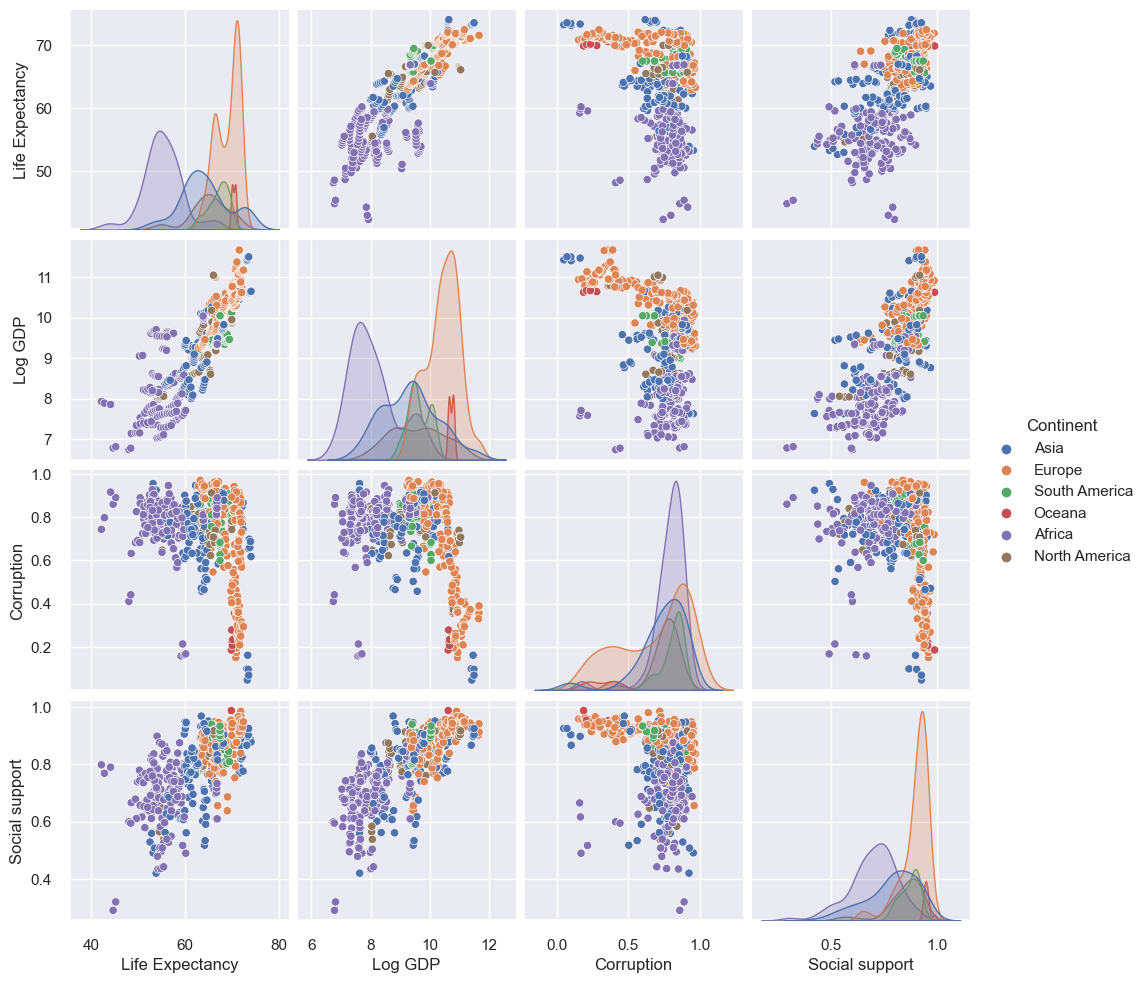

In [80]:
# TODO: Create seaborn pairplots with color based on the instructions above

columns = ['Life Expectancy','Log GDP','Corruption','Social support']

sns.pairplot(merged, vars=columns, hue='Continent')
 

<div class="alert alert-block alert-success"><b>Problem 10 (1 pt.)</b>:
    
In a Markdown cell, explain how the color in the Seaborn pairplot shows adds to the depth of the analysis. Use specific details from your plot in your answer by citing examples with your data.
    
</div>

Color in the Seaborn pairplot provides greater depth of the analysis because it shows in greater detail the relationships between the variables (i.e. happiness measures) on one chart so you can easily see them together. 

In my plot above, you can see that Log GDP vs Life Expectancy shows that Africa (purple dots) has lower Log GDP and Life Expectancy than the other countries. Also, Life Expectancy vs. Corruption shows that Asia (blue dots) has lower Life Expectancy and higher Corruption. Both are much easier to see and read through Seaborn pairplot. 


### Write out your final data

Module 5 and Module 6 homework code can be used as examples for your own EDA phase 1 and phase 2 homework.  After each phase you should be writing out your data so that it can be read into the next phase. After EDA 2, you will be writing an Executive Summary in Jupyter Notebook where you should do no data cleaning, but simply read in your final file and provide your analysis.

In [ ]:
merged.to_csv('Happiness_final.csv', header = True, index = False)

### This section below is not part of the homework this week, but is extra sample code for your reference.  
    
The code shows the following:

1. Plotting by year on x-axis to show change over time
2. Ranking of data and using the ranks to group the data into bins
    


### Plotting over time

We will take the 10 largest countries in regard to `Population` in 2015. Notice that we are using `index` and `.loc` to get all columns of data and storing this into a new dataframe called `largest`.

In [ ]:
index = year2015['Population'].nlargest(10).index
index
largest = merged.loc[index]
largest 

Since we plan to plot for all the years in the data, we need to get all the data for our top ten countries from the `merged` dataframe. 

In [ ]:
comparelist = list(largest['Country'])
comparelist
compare = merged[merged['Country'].isin(comparelist)]

This plot shows the choice of freedom happiness category for our ten countries from 2015 to 2019.

In [ ]:
fig = px.line(compare, x = "Year", y = "Choice Freedom", color='Country', 
        title='Freedom of Choice ', color_discrete_sequence = px.colors.qualitative.Bold)

fig.update_layout(height = 600, xaxis_title = 'Year')

### Ranking of data

There will be times when you will want to look at sections of your data to see if there are differences between groupings. One way to do this is with ranking of data and the creating groups. This is different from clustering because you are chosing the ranking variable and the cut offs for the groups.

 __[Data Frame Rank](https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rank.html)__

In [ ]:
# create a copy of 2015 data
year2015copy = year2015.copy()

When you look at five sample rows of data after the ranking, you can see a new column called `popRank` that has given the most populous country in 2015 a value of 1 and the least populous a value of 113.

In [ ]:
year2015copy = year2015copy.reset_index()
year2015copy['popRank'] = year2015copy['Population'].rank(ascending = False)
year2015copy.sample(5)

When creating categories, the number of categories and the breakdown of each category will depend on the data.  For example purposes, this data will be broken into three categories with the splits based on the `popRank` column.

In [ ]:
from pandas import Categorical 
# create categorical variable for rankings - divide in thirds
top_cat = 37 # gives us top third of rankings based on 113 countries
low_cat = 75 # gives us bottom third of rankings

# assign a category of 1, 2, or 3 based on how ranked with teeth value
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] <= top_cat,1,2))
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] >= low_cat,3,year2015copy['popCat']))
year2015copy['popCat'].value_counts()

In [ ]:
temp = year2015copy[['Country','Population','popRank']]
temp.sort_values(by = ['popRank'])

### Results of Rankings and Categorization
Using `groupby` we can see the mean values for each category.

Keep in mind that Group 1 is the most populous and Group 3 is the least populous.
1. Interesting that almost all of the categories are better for group 3 - or the least populous. 
2. And then Group 1, the most populous, has the next best set of scores.
3. The worst group in almost every category is group 2!


In [ ]:
# how do our groupings differ?
year2015copy.groupby('popCat').mean(numeric_only = True)

Even though there appear to be difference between the three categories when looking at the means, the plots below do not show any patterns.

In [ ]:
# pairplots on three fields
#columns = year2015copy.columns[1:5]
#columns
sns.pairplot(year2015copy, hue = 'popCat', kind = 'scatter',  corner = True, 
             vars = ['Life Ladder', 'Log GDP', 'Corruption', 'Life Expectancy'])
